# Tutorial from Deep-Forest
### https://deepforest.readthedocs.io/en/latest/getting_started.html

In [1]:
#Import libraries
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt

In [2]:
#Load model
model = main.deepforest()
model.use_release()

Reading config file: /home/cpranav93/miniconda3/envs/deepforest/lib/python3.11/site-packages/deepforest/data/deepforest_config.yml


/home/cpranav93/miniconda3/envs/deepforest/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/cpranav93/miniconda3/envs/deepforest/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /home/cpranav93/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:10<00:00, 12.6MB/s] 


NEON.pt: 129MB [00:10, 12.3MB/s]                              


Model was downloaded and saved to /home/cpranav93/miniconda3/envs/deepforest/lib/python3.11/site-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [5]:
#Provided sample image
image_path = get_data("OSBS_029.png")
image_path

'/home/cpranav93/miniconda3/envs/deepforest/lib/python3.11/site-packages/deepforest/data/OSBS_029.png'

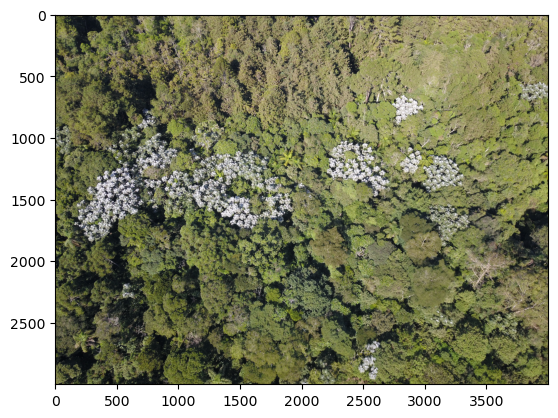

In [15]:
#Using deepforest with drone image from project
import matplotlib.image as mpimg
drone_image_path = "DJI_0021.JPG"
drone_image = mpimg.imread(drone_image_path)
plt.imshow(drone_image)

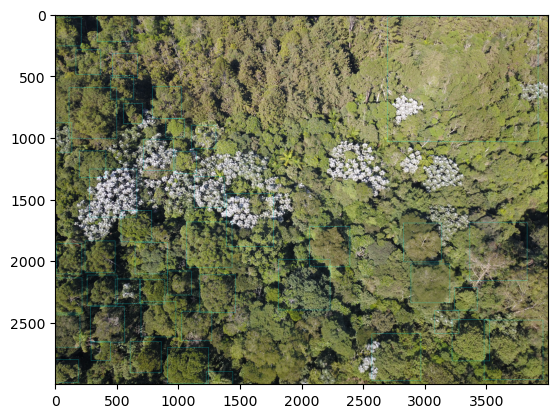

In [25]:
#Use deepforest model to predict bounding boxes
img = model.predict_image(path=drone_image_path, return_plot = True)
plt.imshow(img[:,:,::-1]) #Resulting boxes are visible but faint

In [35]:
#Predict using deepforest model with tif files
import matplotlib.pyplot as plt
tif_image_path = 'Map1_Orthomosaic_export_SatJun10172428194829.tif'
tif_image = plt.imread(tif_image_path)

In [ ]:
plt.imshow(tif_image[:,:,:])

In [40]:
tif_image.shape

(7772, 10349, 4)

In [ ]:
tif_output = model.predict_tile(tif_image[:,:,0:2], return_plot = True, patch_size = 300, patch_overlap = 0.25)

In [42]:
raster_path = get_data("OSBS_029.tif")
raster_path

'/home/cpranav93/miniconda3/envs/deepforest/lib/python3.11/site-packages/deepforest/data/OSBS_029.tif'

In [43]:
sample_tif_image = plt.imread(raster_path)

In [44]:
sample_tif_image.shape

(400, 400, 3)

In [97]:
meta = src.meta

In [140]:
import rasterio as rio
src = rio.open(tif_image_path)
band1 = src.read(1)[4000:5000, 5000:6000]
band2 = src.read(2)[4000:5000, 5000:6000]
band3 = src.read(3)[4000:5000, 5000:6000]

In [141]:
meta['count'] = 3
meta['width'] = 1000
meta['height'] = 1000
meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1000,
 'height': 1000,
 'count': 3,
 'crs': CRS.from_epsg(31983),
 'transform': Affine(0.06819290153139987, 0.0, 330886.4866037272,
        0.0, -0.06819290153139987, 7366992.786549322)}

In [152]:
with rio.open(
    'new2.tif',
    'w',
    **meta
) as dst:
    dst.write_band(1, band1)
    dst.write_band(2, band2)
    dst.write_band(3, band3)

In [143]:
new_tif_path = 'new2.tif'
src2 = rio.open(new_tif_path)

In [147]:
short_boxes = model.predict_tile(new_tif_path, return_plot = True, patch_size = 300, patch_overlap = 0.25)

100%|██████████| 25/25 [01:01<00:00,  2.46s/it]

499 predictions in overlapping windows, applying non-max supression
252 predictions kept after non-max suppression


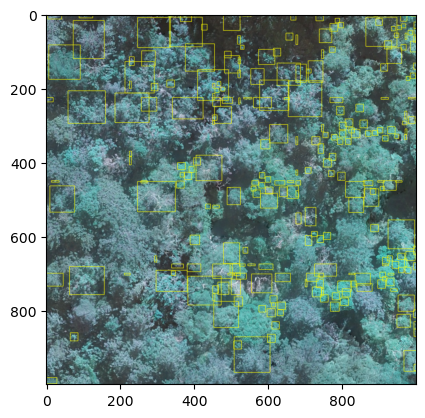

In [149]:
plt.imshow(short_boxes)

In [122]:
raster_path = get_data("OSBS_029.tif")
# Window size of 300px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=300,patch_overlap=0.25)

100%|██████████| 4/4 [00:06<00:00,  1.65s/it]

197 predictions in overlapping windows, applying non-max supression
95 predictions kept after non-max suppression


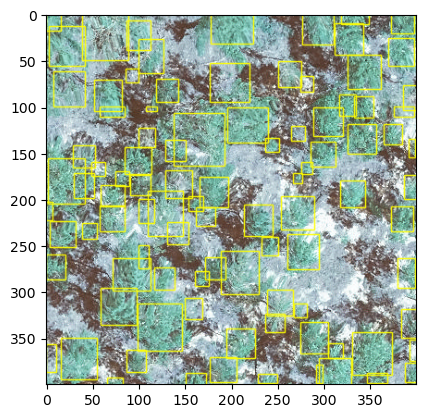

In [148]:
plt.imshow(predicted_raster)